In [1]:
import numpy as np
from itertools import combinations
import os
import mdtraj as md
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.ndimage import gaussian_filter
import pandas as pd
import pytraj as pt
import glob

# PyEmma
import pyemma
import pyemma.msm as msm
import pyemma.plots as mpl
import pyemma.coordinates as coor

In [2]:
pwd # to know where we are

'/home/janet/Desktop/NOTEBOOKS'

In [3]:

directo='/home/janet/Desktop/HSVTK/THM_ATP/'
trajfiles_THM_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_THM_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_THM_ATP.pdb'

directo='/home/janet/Desktop/HSVTK/GCV_ATP/'
trajfiles_GCV_ATP=[fi for fi in glob.glob(directo + '*_super.dcd')]
topfile_GCV_ATP='/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV_ATP.pdb'


In [4]:
trajfiles_THM

['/home/janet/Desktop/HSVTK/THM/dyn_MD_1E2K_THM1_super.dcd',
 '/home/janet/Desktop/HSVTK/THM/dyn_MD_1E2K_THM2_super.dcd',
 '/home/janet/Desktop/HSVTK/THM/dyn_MD_1E2K_THM3_super.dcd']

In [5]:
topfile_GCV

'/home/janet/Desktop/HSVTK/TOPS/MD_1E2K_GCV.pdb'

In [6]:
#Rename the trajfiles and topfiles in an acronim system

In [6]:
THM_ATP = pt.iterload(trajfiles_THM_ATP , top=topfile_THM_ATP )
GCV_ATP = pt.iterload(trajfiles_GCV_ATP , top=topfile_GCV_ATP )

In [8]:
THM_ATP

pytraj.TrajectoryIterator, 75000 frames: 
Size: 17.038733 (GB)
<Topology: 10164 atoms, 664 residues, 8 mols, PBC with box type = orthorhombic>
           

In [9]:
#Distances that we want to do

In [12]:
##Catalitic distances between GLU(38) and GCV chain A

GCV_ATP_A = pt.distance(GCV_ATP, ':38@CD :661@O3')
THM_ATP_A = pt.distance(THM_ATP, ':38@CD :661@O3')

#GCV_A = np.hstack(GCV_A) #Reformat the output to be 1D array
GCV_ATP_A = np.hstack(GCV_ATP_A)
THM_ATP_A = np.hstack(THM_ATP_A)

frames = np.array(list(range(len(GCV_ATP_A))))

In [13]:
#Catalitic distances between GLU (370) and THM/GCV chain B

GCV_ATP_B = pt.distance(GCV_ATP, ':367@CD :662@O3')
THM_ATP_B = pt.distance(THM_ATP, ':367@CD :662@O3')

#GCV_B= np.hstack(GCV_B) #Reformat the output to be 1D array
GCV_ATP_B= np.hstack(GCV_ATP_B)
THM_ATP_B= np.hstack(THM_ATP_B)

frames = np.array(list(range(len(GCV_ATP_B))))

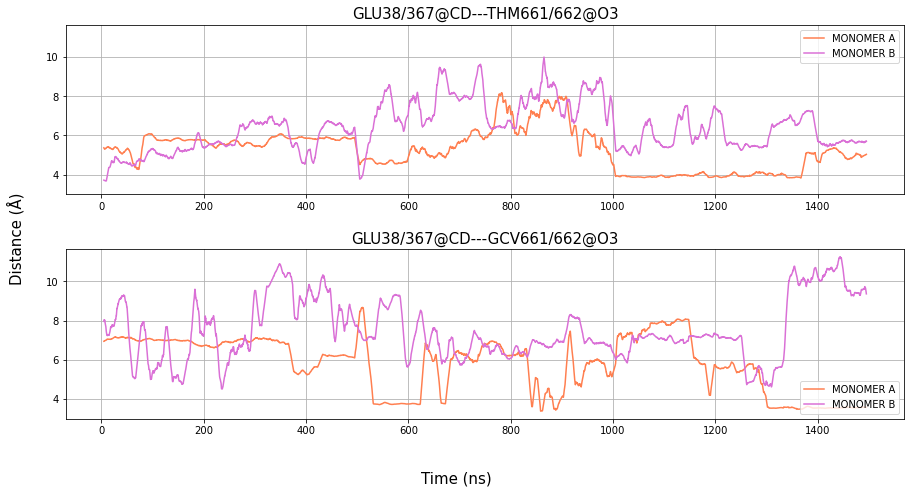

In [15]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(13,7), sharey=True)
window=500
x=((frames-500/2)/50)

ax1.plot(x,pd.Series(THM_ATP_A).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax1.plot(x,pd.Series(THM_ATP_B).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax2.plot(x,pd.Series(GCV_ATP_A).rolling(window).mean(), label = 'MONOMER A', color='coral', linestyle='-')
ax2.plot(x,pd.Series(GCV_ATP_B).rolling(window).mean(), label = 'MONOMER B', color='orchid', linestyle='-')

ax1.set_title('GLU38/367@CD---THM661/662@O3', fontsize=15)
ax2.set_title('GLU38/367@CD---GCV661/662@O3', fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
         
ax1.grid()
ax2.grid()
   
fig.supxlabel('Time (ns)', fontsize=15)
fig.supylabel('Distance (Å)', fontsize=15)

ax1.legend(loc='upper right', fontsize=10)     
ax2.legend(loc='lower right', fontsize=10)   

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

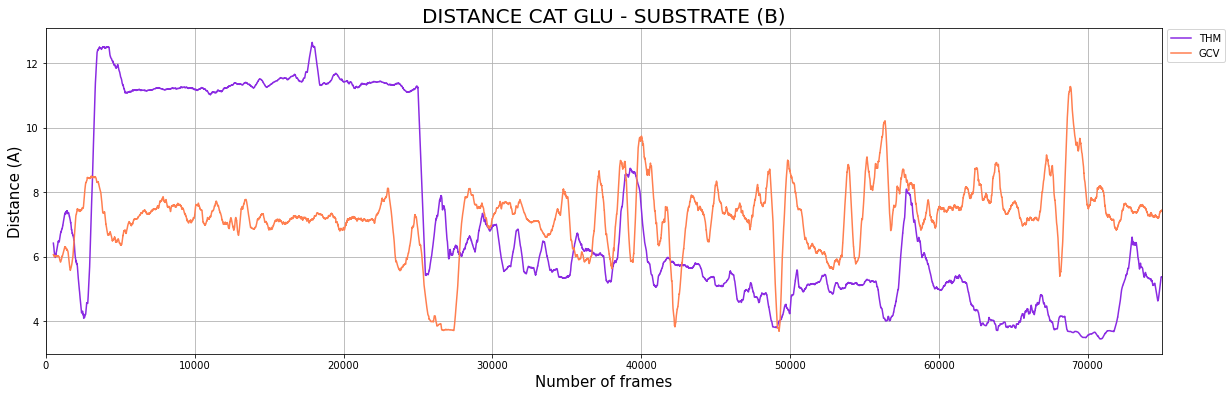

In [10]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(THM_B).rolling(window).mean(), label = 'THM', color='blueviolet', linestyle='-') 
plt.plot(alpha=0.1, color = 'dimgray')

plt.plot(pd.Series(GCV_B).rolling(window).mean(), label = 'GCV', color='coral', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.xlim(0,75001)
plt.grid()
plt.title('DISTANCE CAT GLU - SUBSTRATE (B)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

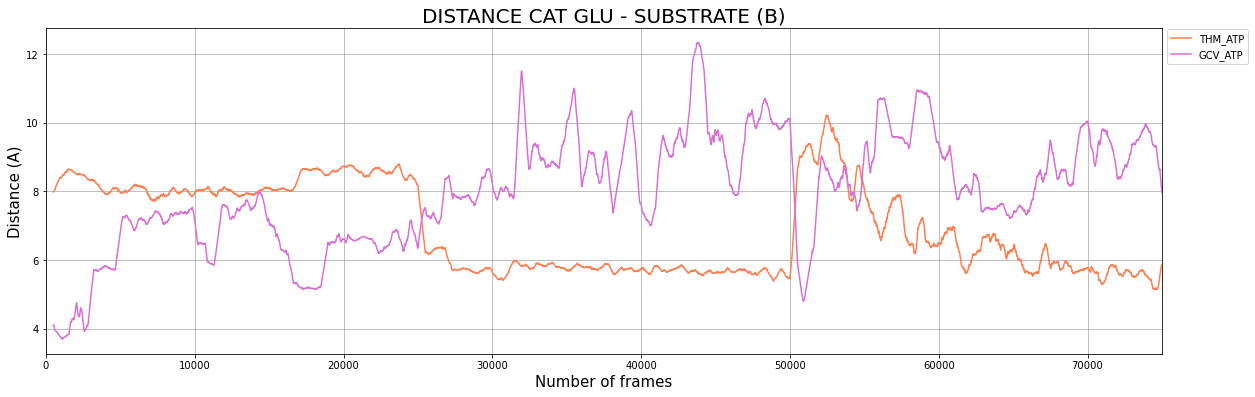

In [59]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(THM_ATP_B).rolling(window).mean(), label = 'THM_ATP', color='coral', linestyle='-') 
plt.plot(alpha=0.1, color = 'dimgray')

plt.plot(pd.Series(GCV_ATP_B).rolling(window).mean(), label = 'GCV_ATP', color='orchid', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.xlim(0,75001)
plt.grid()
plt.title('DISTANCE CAT GLU - SUBSTRATE (B)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [16]:
del GCV_ATP_A, THM_ATP_A, THM_ATP_B, GCV_ATP_B

In [17]:
#Catalitic distances between ATP(331) and THM/GCV chain A

GCV_ATP_A = pt.distance(GCV_ATP, ':663@PG :661@O3')
THM_ATP_A = pt.distance(THM_ATP, ':663@PG :661@O3')

#Reformat the output to be 1D array
GCV_ATP_A= np.hstack(GCV_ATP_A)
THM_ATP_A= np.hstack(THM_ATP_A)
frames = np.array(list(range(len(GCV_ATP_A))))

In [18]:
#Catalitic distances between ATP (331) and THM/GCV chain B
GCV_ATP_B = pt.distance(GCV_ATP, ':664@PG :662@O3')
THM_ATP_B = pt.distance(THM_ATP, ':664@PG :662@O3')

#Reformat the output to be 1D array
GCV_ATP_B= np.hstack (GCV_ATP_B)
THM_ATP_B= np.hstack (THM_ATP_B)
frames = np.array(list(range(len(GCV_ATP_B))))

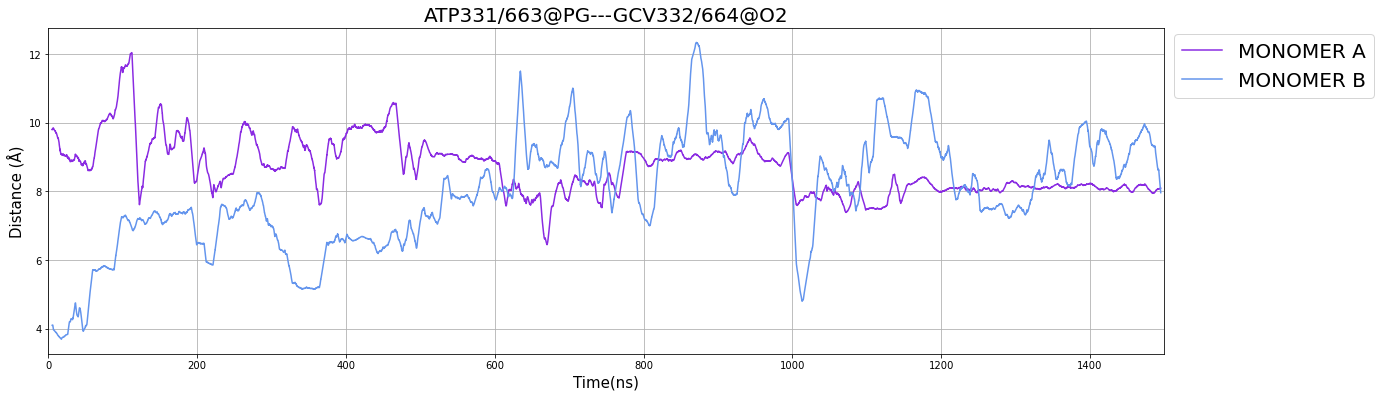

In [84]:
plt.figure(figsize=(20,6))
window = 500

plt.plot((frames-window/2)/50,pd.Series(GCV_ATP_A).rolling(window).mean(), label = 'MONOMER A', color='blueviolet', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot((frames-window/2)/50,pd.Series(GCV_ATP_B).rolling(window).mean(), label = 'MONOMER B', color='cornflowerblue', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.xlim(0,1500)
plt.grid()
plt.title('ATP331/663@PG---GCV332/664@O2', fontsize=20)
plt.xlabel('Time(ns)', fontsize=15)
plt.ylabel('Distance (Å)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left', fontsize=20)

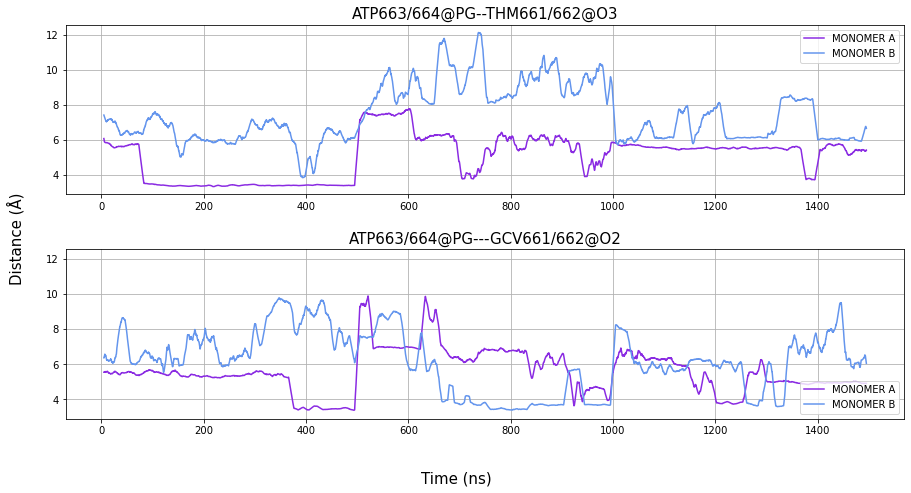

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(13,7), sharey=True)
window=500
x=((frames-500/2)/50)

ax1.plot(x,pd.Series(THM_ATP_A).rolling(window).mean(), label = 'MONOMER A', color='blueviolet', linestyle='-')
ax1.plot(x,pd.Series(THM_ATP_B).rolling(window).mean(), label = 'MONOMER B', color='cornflowerblue', linestyle='-')

ax2.plot(x,pd.Series(GCV_ATP_A).rolling(window).mean(), label = 'MONOMER A', color='blueviolet', linestyle='-')
ax2.plot(x,pd.Series(GCV_ATP_B).rolling(window).mean(), label = 'MONOMER B', color='cornflowerblue', linestyle='-')

ax1.set_title('ATP663/664@PG--THM661/662@O3', fontsize=15)
ax2.set_title('ATP663/664@PG---GCV661/662@O2', fontsize=15)

ax1.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='major', labelsize=10)
         
ax1.grid()
ax2.grid()
   
fig.supxlabel('Time (ns)', fontsize=15)
fig.supylabel('Distance (Å)', fontsize=15)

ax1.legend(loc='upper right', fontsize=10)     
ax2.legend(loc='lower right', fontsize=10)   

fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)

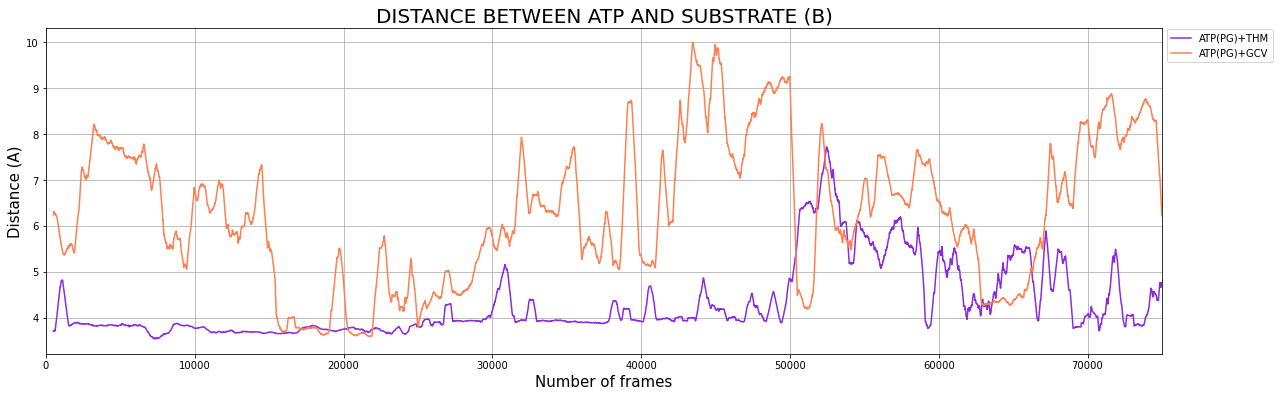

In [46]:
plt.figure(figsize=(20,6))
window = 500

plt.plot((windows/frames)pd.Series(THM_ATP_B).rolling(window).mean(), label = 'ATP(PG)+THM', color='blueviolet', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_ATP_B).rolling(window).mean(), label = 'ATP(PG)+GCV', color='coral', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.xlim(0,75001)
plt.grid()
plt.title('DISTANCE BETWEEN ATP AND SUBSTRATE (B)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [32]:
#Catalitic distances between ATP(331) and THM/GCV chain A - np.hstack

GCV_ATP_A_O1G = pt.distance(GCV_ATP, ':331@O1G :332@O2')
THM_ATP_A_O1G = pt.distance(THM_ATP, ':331@O1G :332@O3')
GCV_ATP_A_O2G = pt.distance(GCV_ATP, ':331@O2G :332@O2')
THM_ATP_A_O2G = pt.distance(THM_ATP, ':331@O2G :332@O3')
GCV_ATP_A_O3G = pt.distance(GCV_ATP, ':331@O3G :332@O2')
THM_ATP_A_O3G = pt.distance(THM_ATP, ':331@O3G :332@O3')

#Reformat the output to be 1D array
GCV_ATP_A_O1G = np.hstack(GCV_ATP_A_O1G)
THM_ATP_A_O1G = np.hstack(THM_ATP_A_O1G)
GCV_ATP_A_O2G = np.hstack(GCV_ATP_A_O2G)
THM_ATP_A_O2G = np.hstack(THM_ATP_A_O2G)
GCV_ATP_A_O3G = np.hstack(GCV_ATP_A_O3G)
THM_ATP_A_O3G = np.hstack(THM_ATP_A_O3G)
frames = np.array(list(range(len(GCV_ATP_A_O1G))))

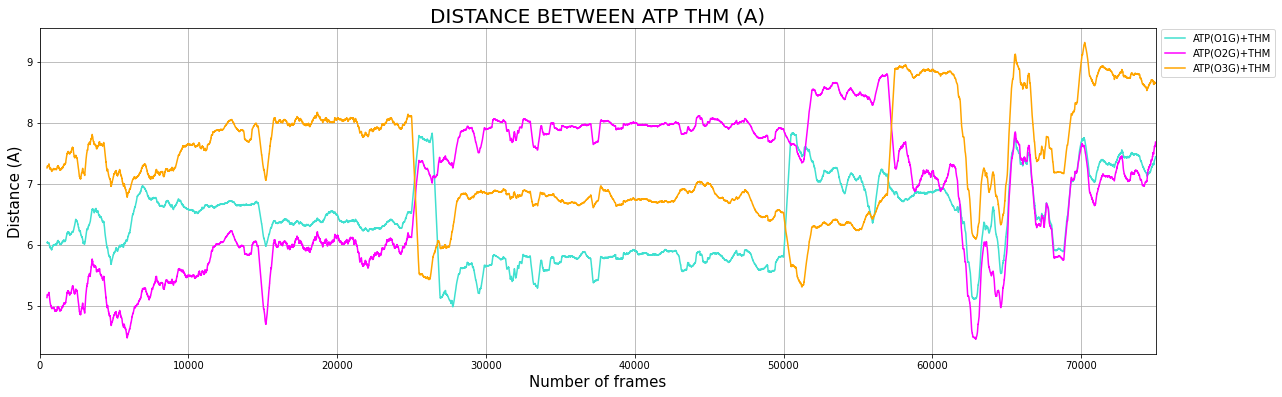

In [60]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(THM_ATP_A_O1G).rolling(window).mean(), label = 'ATP(O1G)+THM', color='turquoise', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(THM_ATP_A_O2G).rolling(window).mean(), label = 'ATP(O2G)+THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(THM_ATP_A_O3G).rolling(window).mean(), label = 'ATP(O3G)+THM', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'orange')

plt.xlim(0,75001)
plt.grid()
plt.title('DISTANCE BETWEEN ATP THM (A)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

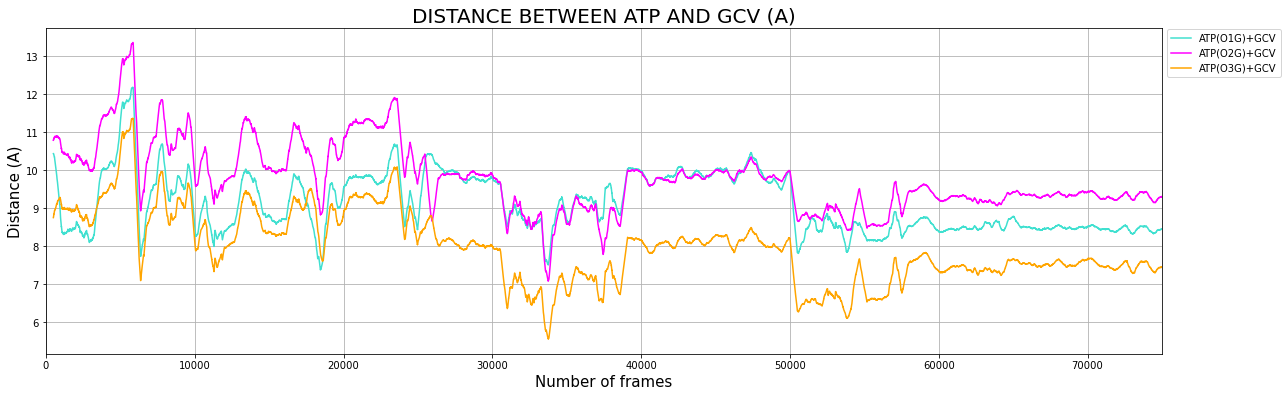

In [62]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(GCV_ATP_A_O1G).rolling(window).mean(), label = 'ATP(O1G)+GCV', color='turquoise', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(GCV_ATP_A_O2G).rolling(window).mean(), label = 'ATP(O2G)+GCV', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_ATP_A_O3G).rolling(window).mean(), label = 'ATP(O3G)+GCV', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'orange')

plt.xlim(0,75001)
plt.grid()

plt.title('DISTANCE BETWEEN ATP AND GCV (A)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

In [36]:
#Catalitic distances between ATP(331) and THM/GCV chain B - np.hstack

GCV_ATP_B_O1G = pt.distance(GCV_ATP, ':663@O1G :664@O2')
THM_ATP_B_O1G = pt.distance(THM_ATP, ':663@O1G :664@O3')
GCV_ATP_B_O2G = pt.distance(GCV_ATP, ':663@O2G :664@O2')
THM_ATP_B_O2G = pt.distance(THM_ATP, ':663@O2G :664@O3')
GCV_ATP_B_O3G = pt.distance(GCV_ATP, ':663@O3G :664@O2')
THM_ATP_B_O3G = pt.distance(THM_ATP, ':663@O3G :664@O3')

#Reformat the output to be 1D array
GCV_ATP_B_O1G = np.hstack(GCV_ATP_B_O1G)
THM_ATP_B_O1G = np.hstack(THM_ATP_B_O1G)
GCV_ATP_B_O2G = np.hstack(GCV_ATP_B_O2G)
THM_ATP_B_O2G = np.hstack(THM_ATP_B_O2G)
GCV_ATP_B_O3G = np.hstack(GCV_ATP_B_O3G)
THM_ATP_B_O3G = np.hstack(THM_ATP_B_O3G)
frames = np.array(list(range(len(GCV_ATP_B_O1G))))

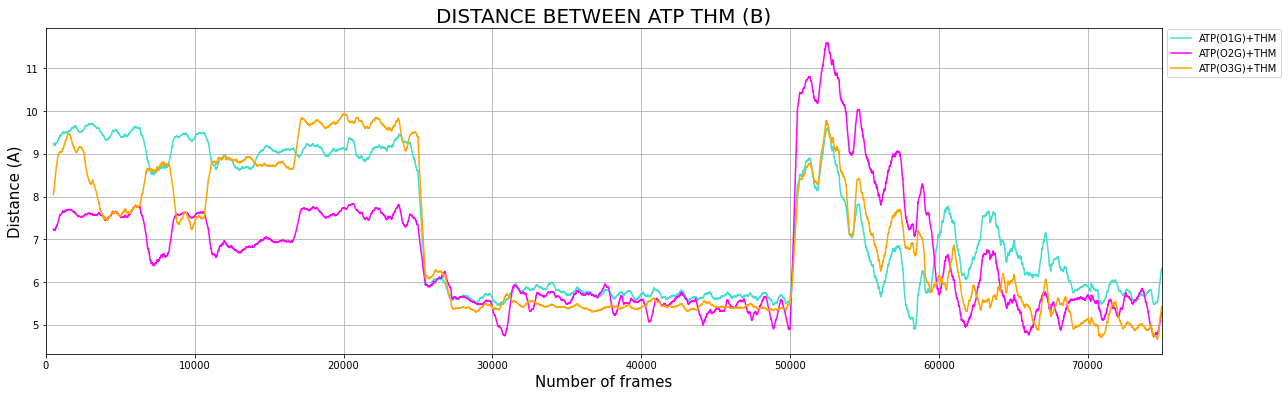

In [63]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(THM_ATP_B_O1G).rolling(window).mean(), label = 'ATP(O1G)+THM', color='turquoise', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(THM_ATP_B_O2G).rolling(window).mean(), label = 'ATP(O2G)+THM', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(THM_ATP_B_O3G).rolling(window).mean(), label = 'ATP(O3G)+THM', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'orange')


plt.xlim(0,75001)
plt.grid()

plt.title('DISTANCE BETWEEN ATP THM (B)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')

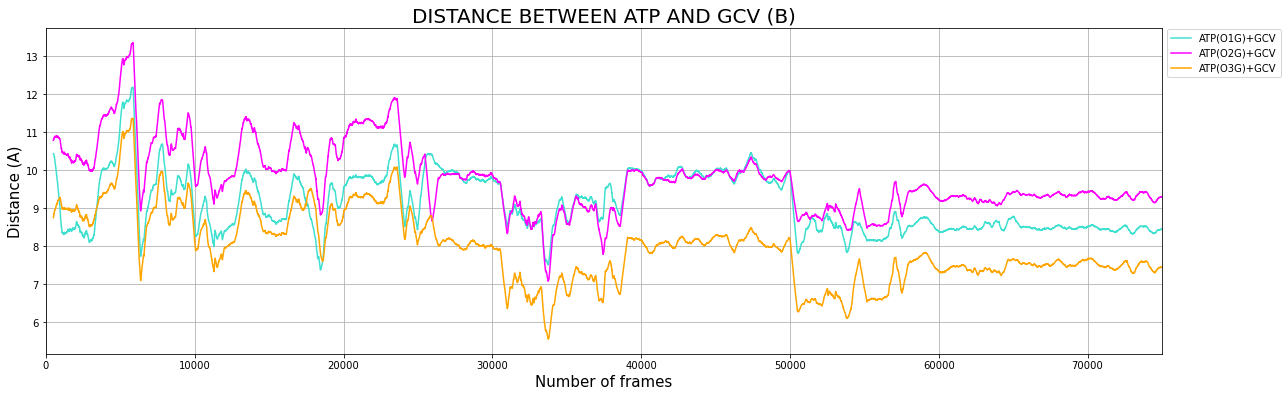

In [64]:
plt.figure(figsize=(20,6))
window = 500

plt.plot(pd.Series(GCV_ATP_A_O1G).rolling(window).mean(), label = 'ATP(O1G)+GCV', color='turquoise', linestyle='-') 
plt.plot(alpha=0.1, color = 'teal')

plt.plot(pd.Series(GCV_ATP_A_O2G).rolling(window).mean(), label = 'ATP(O2G)+GCV', color='magenta', linestyle='-') 
plt.plot(alpha=0.1, color = 'magenta')

plt.plot(pd.Series(GCV_ATP_A_O3G).rolling(window).mean(), label = 'ATP(O3G)+GCV', color='orange', linestyle='-') 
plt.plot(alpha=0.1, color = 'orange')


plt.xlim(0,75001)
plt.grid()

plt.title('DISTANCE BETWEEN ATP AND GCV (B)', fontsize=20)
plt.xlabel('Number of frames', fontsize=15)
plt.ylabel('Distance (A)', fontsize=15)
plt.legend(bbox_to_anchor=(1.0, 0.81, 0.5, 0.2), loc='upper left')